In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.shape

(731, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

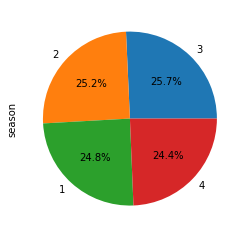

In [8]:
data['season'].value_counts().plot(kind='pie',autopct='%1.1f%%')

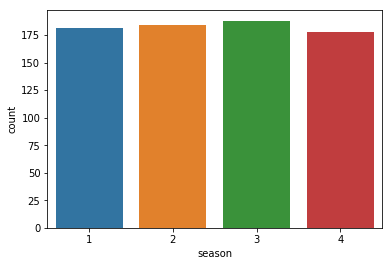

In [9]:
sn.countplot(x='season',data=data)
plt.show()

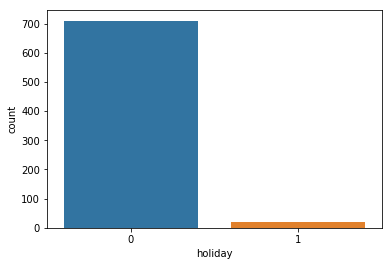

In [10]:
sn.countplot(x='holiday',data=data)
plt.show()

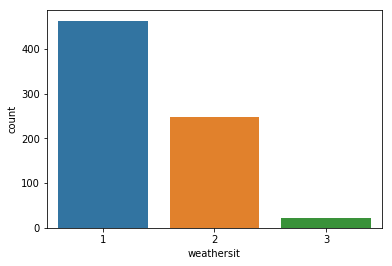

In [11]:
sn.countplot(x='weathersit',data=data)
plt.show()

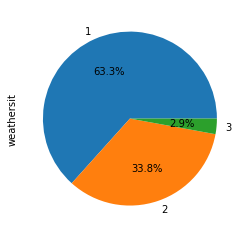

In [12]:
data['weathersit'].value_counts().plot(kind='pie',autopct='%1.1f%%')

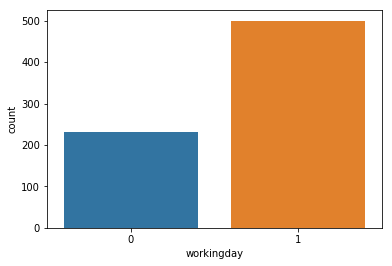

In [13]:
sn.countplot(x='workingday',data=data)
plt.show()

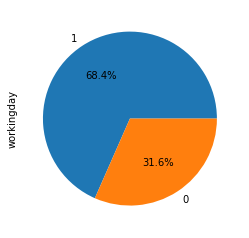

In [14]:
data['workingday'].value_counts().plot(kind='pie',autopct='%1.1f%%')

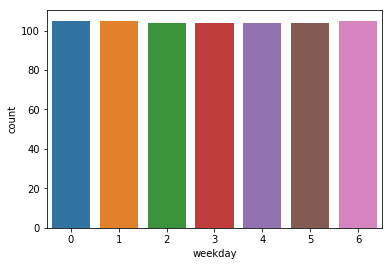

In [15]:
sn.countplot(x='weekday',data=data)
plt.show()

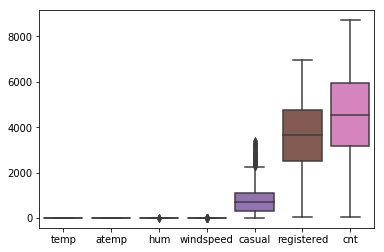

In [16]:
sn.boxplot(data=data[['temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])

In [17]:
data['date']=pd.to_datetime(data['dteday'])
data['month']=data['date'].dt.month
data['year']=data['date'].dt.year
data['day']=data['date'].dt.day
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,month,year,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011-01-01,1,2011,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011-01-02,1,2011,2
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011-01-03,1,2011,3
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011-01-04,1,2011,4
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011-01-05,1,2011,5


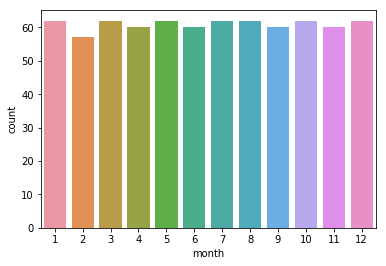

In [18]:
sn.countplot(x='month',data=data)

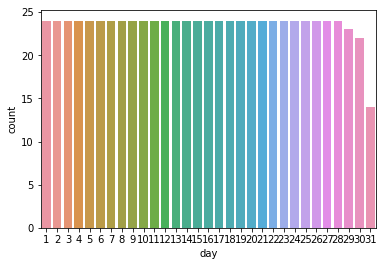

In [19]:
sn.countplot(x='day',data=data)

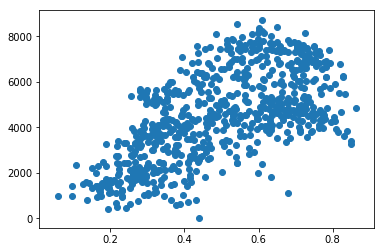

In [20]:
plt.scatter(x='temp',y='cnt',data=data)

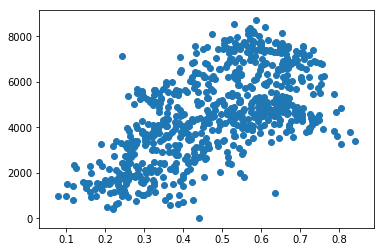

In [21]:
plt.scatter(x='atemp',y='cnt',data=data)

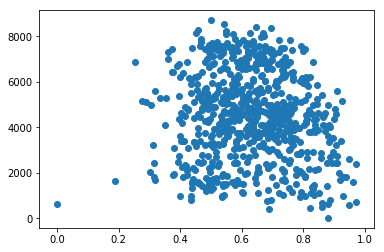

In [22]:
plt.scatter(x='hum',y='cnt',data=data)

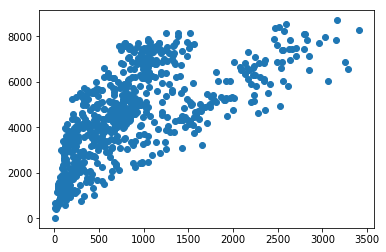

In [23]:
plt.scatter(x='casual',y='cnt',data=data)

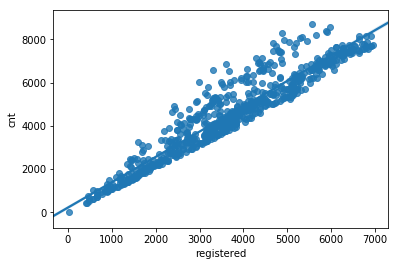

In [24]:
sn.regplot(x='registered',y='cnt',data=data)

In [25]:
cor=data.corr()
cor.nlargest(15,['cnt'])['cnt']

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
year          0.566710
yr            0.566710
season        0.406100
mnth          0.279977
month         0.279977
weekday       0.067443
workingday    0.061156
day          -0.024204
holiday      -0.068348
Name: cnt, dtype: float64

In [26]:
season=pd.get_dummies(data['season'],prefix='season')
data=pd.concat([data,season],axis=1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,date,month,year,day,season_1,season_2,season_3,season_4
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985,2011-01-01,1,2011,1,1,0,0,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801,2011-01-02,1,2011,2,1,0,0,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349,2011-01-03,1,2011,3,1,0,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1454,1562,2011-01-04,1,2011,4,1,0,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1518,1600,2011-01-05,1,2011,5,1,0,0,0


In [27]:
weather=pd.get_dummies(data['weathersit'],prefix='weathersit')
data=pd.concat([data,weather],axis=1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,month,year,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,2011,1,1,0,0,0,0,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,1,2011,2,1,0,0,0,0,1,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1,2011,3,1,0,0,0,1,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1,2011,4,1,0,0,0,1,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1,2011,5,1,0,0,0,1,0,0


In [28]:
data=data.drop(['season','instant','weathersit','dteday','date','mnth'],axis=1)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,month,year,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,...,1,2011,1,1,0,0,0,0,1,0
1,0,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,...,1,2011,2,1,0,0,0,0,1,0
2,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,1,2011,3,1,0,0,0,1,0,0
3,0,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,...,1,2011,4,1,0,0,0,1,0,0
4,0,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,...,1,2011,5,1,0,0,0,1,0,0


In [29]:
cor=data.corr()
cor.nlargest(21,['cnt'])['cnt']

cnt             1.000000
registered      0.945517
casual          0.672804
atemp           0.631066
temp            0.627494
year            0.566710
yr              0.566710
season_3        0.346487
month           0.279977
weathersit_1    0.252870
season_2        0.146197
weekday         0.067443
season_4        0.065593
workingday      0.061156
day            -0.024204
holiday        -0.068348
hum            -0.100659
weathersit_2   -0.172879
windspeed      -0.234545
weathersit_3   -0.239958
season_1       -0.563094
Name: cnt, dtype: float64

In [31]:
x=data.drop(['cnt'],axis=1)
x.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,month,year,day,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,0,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,1,2011,1,1,0,0,0,0,1,0
1,0,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,1,2011,2,1,0,0,0,0,1,0
2,0,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1,2011,3,1,0,0,0,1,0,0
3,0,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1,2011,4,1,0,0,0,1,0,0
4,0,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1,2011,5,1,0,0,0,1,0,0


In [32]:
y=data['cnt']
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
pred=model.predict(X_test)
pred

array([3830., 2114., 3915., 4322., 6591., 5204., 5323., 3351., 3068.,
       4972., 3351., 1977.,  822., 2485., 7736., 2368., 5515., 6572.,
       4511., 4359., 1851., 7335., 4758., 2689., 4966., 4118., 6824.,
       4375., 3389., 2475.,  754., 3523., 1683., 1749., 6241., 4570.,
       1416., 3368., 6591., 4023., 4553., 7424., 4840., 5728., 5202.,
       4717., 7338., 4035., 2277., 4866., 2034., 7693., 3403., 1812.,
       4304., 2947., 1969., 7006., 4656., 1927., 2376., 2134., 5084.,
       2121., 4154., 8294., 4592., 5319., 1685., 3204., 7261., 6825.,
       5035., 1562., 7444., 7415., 7765., 4507., 1872., 3310., 4826.,
       3376., 7570., 2402., 5267., 3659., 3126., 4150., 6864., 3574.,
       1005., 5058., 5138., 5342., 3005., 1746., 1000., 6891., 4665.,
       1341., 3577.,  985., 4367., 5047., 6192., 2192., 2594., 2169.,
       2133., 2302., 4058., 3644., 2425., 3740., 4788., 4509., 7458.,
       5538., 4066., 7273., 2496., 3761., 6597., 1693., 2918., 3322.,
       1421., 3333.,

In [37]:
model.score(X_train,y_train)

1.0

In [38]:
model.score(X_test,y_test)

1.0

In [40]:
df=pd.DataFrame({'actual':y_test,'estimated':pred})
df.head()

,actual,estimated
404,3830,3830.0
726,2114,2114.0
159,3915,3915.0
422,4322,4322.0
512,6591,6591.0


In [42]:
from sklearn.model_selection import cross_val_score
m=cross_val_score(model,x,y,cv=5)
m.mean()

1.0